In [4]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import pickle  # For saving and loading the data
import sdf_helper as sh
import os as os

# Matplotlib formatting
from matplotlib.colors import BoundaryNorm
from matplotlib.colors import ListedColormap, LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
hard_drive = '/volumes/My Passport/MMath Project'
os.chdir(hard_drive)

### Global Matplotlib Formatting

In [5]:
# LaTeX for plot labels
plt.rcParams['text.usetex'] = True

# Specify the LaTeX package for standard math fonts
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'


plt.rcParams['xtick.labelsize'] = 15  # Example for x-axis tick labels
plt.rcParams['ytick.labelsize'] = 15 

### Function to extract simulation data

In [6]:
# Function to load saved data
def load_simulation_data(folder):
    with open(f'./{folder}_data.pkl', 'rb') as f:
        data = pickle.load(f)
    return data['times'], data['fluxes']

In [7]:
# List of simulation folders containing times and fluxes
sim_folders_400 = ['sim_400_1', 'sim_400_2', 'sim_400_3', 'sim_400_4', 'sim_400_5', 
               'sim_400_6', 'sim_400_7', 'sim_400_8', 'sim_400_9', 'sim_400_10','sim_400_11', 'sim_400_12',
              'sim_400_13', 'sim_400_14', 'sim_400_15']

sim_folders_800 = [ 'sim_800_1', 'sim_800_2', 'sim_800_3', 'sim_800_4','sim_800_8','sim_800_10','sim_800_5', 'sim_800_6', 'sim_800_7',  'sim_800_9', 'sim_800_11', 'sim_800_12', 
              'sim_800_13', 'sim_800_14', 'sim_800_15']

# Manually list inverse global Lundquist numbers
ls = [1.00000000e-02 ,5.62341325e-03 ,3.16227766e-03 ,1.77827941e-03 ,1.00000000e-03  
    ,5.62341325e-04 ,3.16227766e-04 ,1.77827941e-04   ,1.00000000e-04  ,5.62341325e-05  
    ,3.16227766e-05, 1.77827941e-05, 1.00000000e-05  ,5.62341325e-06,3.16227766e-06] 

ln1 = [round(1/x) for x in ls]

### Plot reconnected flux over time for all simulations

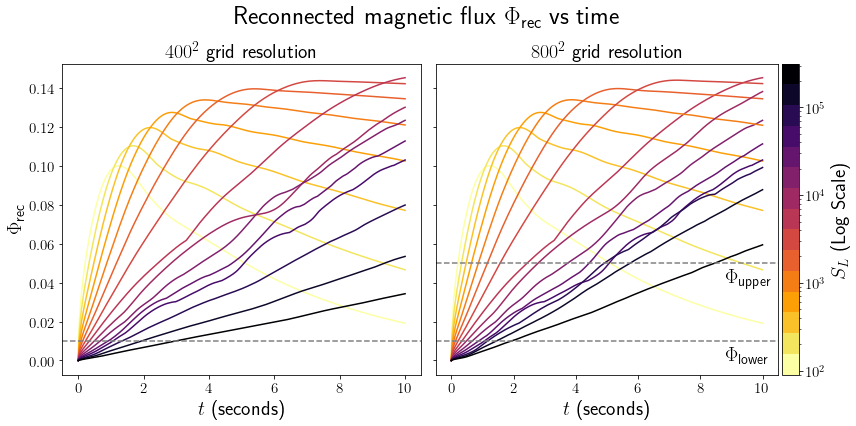

In [24]:
# Colour mapping 

unique_ids = sorted(set([f.split('_')[-1] for f in sim_folders_400 + sim_folders_800]), key=int)
# Generate colours evenly spaced in the colourmap 
colors = plt.cm.inferno_r(np.linspace(0, 1, len(ln1)))

# Create a ListedColormap with the generated colors
color_map_ln1 = ListedColormap(colors)

fig, axs = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 1.01]})

# Assuming load_simulation_data and color mapping logic are correctly implemented
colors_2 = plt.cm.inferno_r(np.linspace(0, 1, len(unique_ids)))
color_map = {uid: color for uid, color in zip(unique_ids, colors_2)}


# Plot for sim_folders_400
for folder in sim_folders_400:
    uid = folder.split('_')[-1]
    times, fluxes = load_simulation_data(folder)  
    axs[0].plot(times, fluxes, color=color_map[uid], linestyle='-') 
    
# Plot for sim_folders_800
for folder in sim_folders_800:
    uid = folder.split('_')[-1]
    times, fluxes = load_simulation_data(folder) 
    axs[1].plot(times, fluxes, color=color_map[uid], linestyle='-')


axs[0].set_xlabel(r'$t$ (seconds)', size=20)
axs[1].set_xlabel(r'$t$ (seconds)', size=20)
axs[0].set_ylabel(r'$\Phi_{ \text{rec}}$', size=20)
axs[1].tick_params(left=True, labelleft=False, bottom=True, labelbottom=True)
axs[0].set_title(r'$400^2$ grid resolution', size=20)
axs[1].set_title(r'$800^2$ grid resolution', size=20)


axs[1].axhline(0.05, linestyle='--', color='grey')
axs[1].axhline(0.01, linestyle='--', color='grey')
axs[0].axhline(0.01, linestyle='--', color='grey')
#axs[0].axhline(0.05, linestyle='--', color='grey')
axs[1].text(8.8, 0.04, r'$\Phi_{\text{upper}}$', size=20)
axs[1].text(8.8, 0.00, r'$\Phi_{\text{lower}}$', size=20)
# Using LogNorm for the color bar to represent log-spaced intervals
sm = plt.cm.ScalarMappable(cmap=color_map_ln1, norm=LogNorm(vmin=max(ln1), vmax=min(ln1)))
sm.set_array([])

# Add colour bar to the right of the axs[1], adjusting its position to avoid overlap
divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label(r'$S_L$ (Log Scale)', size=20)

fig.suptitle(r'Reconnected magnetic flux $\Phi_{\text{rec}}$ vs time', size=25)
plt.tight_layout()


plt.savefig('reconnected_fluxes.png')
plt.show()
